In [1]:
from chesslab.agent_stockfish import agent
from chesslab.tests import kaufman_test
import chess
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
path = 'E:/database/stockfish_14.exe'
deepbot = agent(path,0)

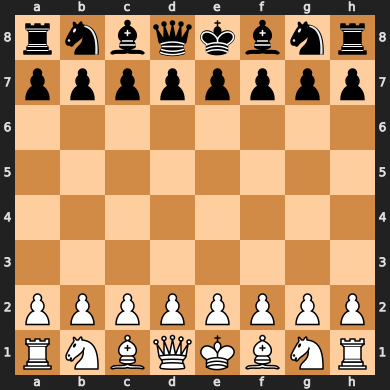

In [2]:
board=chess.Board()
board

In [3]:
move=deepbot.select_move(board)
move

Move.from_uci('d2d4')

In [5]:
moves,values=deepbot.get_move_values(board)

In [6]:
moves

[Move.from_uci('g1h3'),
 Move.from_uci('g1f3'),
 Move.from_uci('b1c3'),
 Move.from_uci('b1a3'),
 Move.from_uci('h2h3'),
 Move.from_uci('g2g3'),
 Move.from_uci('f2f3'),
 Move.from_uci('e2e3'),
 Move.from_uci('d2d3'),
 Move.from_uci('c2c3'),
 Move.from_uci('b2b3'),
 Move.from_uci('a2a3'),
 Move.from_uci('h2h4'),
 Move.from_uci('g2g4'),
 Move.from_uci('f2f4'),
 Move.from_uci('e2e4'),
 Move.from_uci('d2d4'),
 Move.from_uci('c2c4'),
 Move.from_uci('b2b4'),
 Move.from_uci('a2a4')]

In [7]:
values

array([0.46315789, 0.96842105, 0.85263158, 0.40526316, 0.85789474,
       0.94210526, 0.16315789, 0.92631579, 0.85789474, 0.92105263,
       0.78947368, 0.87368421, 0.63157895, 0.        , 0.68421053,
       0.98947368, 1.        , 0.99473684, 0.67368421, 0.66842105])

In [9]:
from chesslab.utils import join_and_sort
join_and_sort(moves,values)

array([[Move.from_uci('d2d4'), 1.0],
       [Move.from_uci('c2c4'), 0.9947368421052631],
       [Move.from_uci('e2e4'), 0.9894736842105263],
       [Move.from_uci('g1f3'), 0.968421052631579],
       [Move.from_uci('g2g3'), 0.9421052631578948],
       [Move.from_uci('e2e3'), 0.9263157894736842],
       [Move.from_uci('c2c3'), 0.9210526315789473],
       [Move.from_uci('a2a3'), 0.8736842105263158],
       [Move.from_uci('h2h3'), 0.8578947368421053],
       [Move.from_uci('d2d3'), 0.8578947368421053],
       [Move.from_uci('b1c3'), 0.8526315789473684],
       [Move.from_uci('b2b3'), 0.7894736842105263],
       [Move.from_uci('f2f4'), 0.6842105263157895],
       [Move.from_uci('b2b4'), 0.6736842105263158],
       [Move.from_uci('a2a4'), 0.6684210526315789],
       [Move.from_uci('h2h4'), 0.631578947368421],
       [Move.from_uci('g1h3'), 0.4631578947368421],
       [Move.from_uci('b1a3'), 0.4052631578947368],
       [Move.from_uci('f2f3'), 0.1631578947368421],
       [Move.from_uci('g2g4')

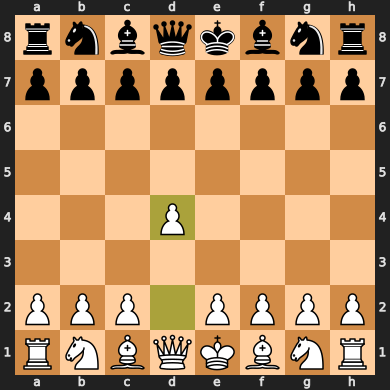

In [10]:
board.push(move)
board

In [11]:
ss = kaufman_test(deepbot)
ss

0.24

In [10]:
import chess.svg
from IPython.display import display
acc,acc_w,data = kaufman_test(deepbot,details=1)
print('Accuracy: {:.0f}/25 = {} | weighted = {:.2}'.format(acc*25,acc,acc_w))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

Kaufman test 
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
Accuracy: 6/25 = 0.24 | weighted = 0.61
id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. 
01 & e4f6 & 27 & 48 & 0.4468 & 0.6655 & e4g5 & 1.0000  \\
02 & f5d4 & 28 & 39 & 0.2895 & 0.6988 & h7h5 & 1.0000  \\
03 & e1d1 & 1 & 38 & 1.0000 & 1.0000 & e1d1 & 1.0000  \\
04 & b1b2 & 26 & 47 & 0.4565 & 0.8442 & c2d4 & 1.0000  \\
05 & g5c1 & 25 & 48 & 0.4894 & 0.5225 & c8c5 & 1.0000  \\
06 & a3a2 & 2 & 31 & 0.9667 & 0.9083 & d7b8 & 1.0000  \\
07 & b7e4 & 23 & 33 & 0.3125 & 0.7582 & f8d8 & 1.0000  \\
08 & h7h6 & 16 & 39 & 0.6053 & 0.6378 & f8f7 & 1.0000  \\
09 & f3e2 & 2 & 35 & 0.9706 & 0.8099 & a1c1 & 1.0000  \\
10 & d5c3 & 2 & 41 & 0.9750 & 0.9235 & d5f4 & 1.0000  \\
11 & g3f5 & 21 & 35 & 0.4118 & 0.4699 & d7f7 & 1.0000  \\
12 & c6d6 & 30 & 41 & 0.2750 & 0.2351 & e7d8 & 1.0000  \\
13 & c3d5 & 21 & 30 & 0.3103 & 0.7358 & d1e3 & 1.0000  \\
14 & b1b2 & 26 & 49 & 0.4792 & 0.7372 & f1d1 & 1.0000  \\
15 & d3f5 & 1

,best_move,value,move_predicted,value_predicted,rank,total moves,weight
0,e4f6,0.665511,e4g5,1.0,27,48,0.446809
1,f5d4,0.698828,h7h5,1.0,28,39,0.289474
2,e1d1,1.000000,e1d1,1.0,1,38,1.000000
3,b1b2,0.844214,c2d4,1.0,26,47,0.456522
4,g5c1,0.522486,c8c5,1.0,25,48,0.489362
5,a3a2,0.908323,d7b8,1.0,2,31,0.966667
6,b7e4,0.758214,f8d8,1.0,23,33,0.312500
7,h7h6,0.637765,f8f7,1.0,16,39,0.605263
8,f3e2,0.809859,a1c1,1.0,2,35,0.970588
9,d5c3,0.923518,d5f4,1.0,2,41,0.975000


In [4]:
deepbot.set_depth(2)
acc,acc_w,data = kaufman_test(deepbot,details=1)
print('Accuracy: {:.0f}/25 = {} | weighted = {:.2}'.format(acc*25,acc,acc_w))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

Accuracy: 6/25 = 0.24 | weighted = 0.61
id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. 
01 & e4f6 & 27 & 48 & 0.4468 & 0.6655 & e4g5 & 1.0000  \\
02 & f5d4 & 28 & 39 & 0.2895 & 0.7026 & h7h5 & 1.0000  \\
03 & e1d1 & 1 & 38 & 1.0000 & 1.0000 & e1d1 & 1.0000  \\
04 & b1b2 & 26 & 47 & 0.4565 & 0.8442 & c2d4 & 1.0000  \\
05 & g5c1 & 25 & 48 & 0.4894 & 0.5225 & c8c4 & 1.0000  \\
06 & a3a2 & 2 & 31 & 0.9667 & 0.9083 & d7b8 & 1.0000  \\
07 & b7e4 & 23 & 33 & 0.3125 & 0.7582 & f8d8 & 1.0000  \\
08 & h7h6 & 16 & 39 & 0.6053 & 0.6378 & f8f1 & 1.0000  \\
09 & f3e2 & 2 & 35 & 0.9706 & 0.8099 & a1c1 & 1.0000  \\
10 & d5c3 & 2 & 41 & 0.9750 & 0.9235 & d5f4 & 1.0000  \\
11 & g3f5 & 21 & 35 & 0.4118 & 0.4699 & d7f7 & 1.0000  \\
12 & c6d6 & 30 & 41 & 0.2750 & 0.2351 & e7e2 & 1.0000  \\
13 & c3d5 & 21 & 30 & 0.3103 & 0.7358 & d1e3 & 1.0000  \\
14 & b1b2 & 26 & 49 & 0.4792 & 0.7372 & f1d1 & 1.0000  \\
15 & d3f5 & 14 & 51 & 0.7400 & 0.8547 & g3h5 & 1.0000  \\
16 & b3b4 & 1 & 10 & 1.0000 & 1.000

,best_move,value,move_predicted,value_predicted,rank,total moves,weight
0,e4f6,0.665511,e4g5,1.0,27,48,0.446809
1,f5d4,0.702629,h7h5,1.0,28,39,0.289474
2,e1d1,1.000000,e1d1,1.0,1,38,1.000000
3,b1b2,0.844214,c2d4,1.0,26,47,0.456522
4,g5c1,0.522486,c8c4,1.0,25,48,0.489362
5,a3a2,0.908323,d7b8,1.0,2,31,0.966667
6,b7e4,0.758214,f8d8,1.0,23,33,0.312500
7,h7h6,0.637765,f8f1,1.0,16,39,0.605263
8,f3e2,0.809859,a1c1,1.0,2,35,0.970588
9,d5c3,0.923518,d5f4,1.0,2,41,0.975000


In [5]:
deepbot.set_depth(3)
acc,acc_w,data = kaufman_test(deepbot,details=1)
print('Accuracy: {:.0f}/25 = {} | weighted = {:.2}'.format(acc*25,acc,acc_w))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

Accuracy: 6/25 = 0.24 | weighted = 0.62
id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. 
01 & e4f6 & 1 & 48 & 1.0000 & 1.0000 & e4f6 & 1.0000  \\
02 & f5d4 & 28 & 39 & 0.2895 & 0.7039 & a5d5 & 1.0000  \\
03 & e1d1 & 1 & 38 & 1.0000 & 1.0000 & e1d1 & 1.0000  \\
04 & b1b2 & 25 & 47 & 0.4783 & 0.8442 & c2d4 & 1.0000  \\
05 & g5c1 & 25 & 48 & 0.4894 & 0.5225 & c8c6 & 1.0000  \\
06 & a3a2 & 10 & 31 & 0.7000 & 0.7853 & d7b8 & 1.0000  \\
07 & b7e4 & 23 & 33 & 0.3125 & 0.7506 & f8d8 & 1.0000  \\
08 & h7h6 & 11 & 39 & 0.7368 & 0.7328 & f8e8 & 1.0000  \\
09 & f3e2 & 2 & 35 & 0.9706 & 0.8099 & a1c1 & 1.0000  \\
10 & d5c3 & 2 & 41 & 0.9750 & 0.9738 & d5f4 & 1.0000  \\
11 & g3f5 & 20 & 35 & 0.4412 & 0.5181 & d7g7 & 1.0000  \\
12 & c6d6 & 30 & 41 & 0.2750 & 0.2351 & e7g7 & 1.0000  \\
13 & c3d5 & 22 & 30 & 0.2759 & 0.7258 & c3e2 & 1.0000  \\
14 & b1b2 & 25 & 49 & 0.5000 & 0.7194 & d3f3 & 1.0000  \\
15 & d3f5 & 13 & 51 & 0.7600 & 0.8379 & a1d1 & 1.0000  \\
16 & b3b4 & 2 & 10 & 0.8889 & 0.970

,best_move,value,move_predicted,value_predicted,rank,total moves,weight
0,e4f6,1.000000,e4f6,1.0,1,48,1.000000
1,f5d4,0.703906,a5d5,1.0,28,39,0.289474
2,e1d1,1.000000,e1d1,1.0,1,38,1.000000
3,b1b2,0.844214,c2d4,1.0,25,47,0.478261
4,g5c1,0.522486,c8c6,1.0,25,48,0.489362
5,a3a2,0.785283,d7b8,1.0,10,31,0.700000
6,b7e4,0.750626,f8d8,1.0,23,33,0.312500
7,h7h6,0.732765,f8e8,1.0,11,39,0.736842
8,f3e2,0.809859,a1c1,1.0,2,35,0.970588
9,d5c3,0.973790,d5f4,1.0,2,41,0.975000


In [3]:
deepbot.set_depth(4)
acc,acc_w,data = kaufman_test(deepbot,details=1)
print('Accuracy: {:.0f}/25 = {} | weighted = {:.2}'.format(acc*25,acc,acc_w))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

Accuracy: 5/25 = 0.2 | weighted = 0.6
id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. 
01 & e4f6 & 25 & 48 & 0.4894 & 0.5854 & d1h5 & 1.0000  \\
02 & f5d4 & 28 & 39 & 0.2895 & 0.6966 & h7h5 & 1.0000  \\
03 & e1d1 & 1 & 38 & 1.0000 & 1.0000 & e1d1 & 1.0000  \\
04 & b1b2 & 30 & 47 & 0.3696 & 0.7103 & e2d4 & 1.0000  \\
05 & g5c1 & 25 & 48 & 0.4894 & 0.5159 & c8e8 & 1.0000  \\
06 & a3a2 & 2 & 31 & 0.9667 & 0.8975 & d7b8 & 1.0000  \\
07 & b7e4 & 23 & 33 & 0.3125 & 0.7582 & f8d8 & 1.0000  \\
08 & h7h6 & 15 & 39 & 0.6316 & 0.6731 & f8f3 & 1.0000  \\
09 & f3e2 & 2 & 35 & 0.9706 & 0.7804 & a1c1 & 1.0000  \\
10 & d5c3 & 2 & 41 & 0.9750 & 0.9436 & d5f4 & 1.0000  \\
11 & g3f5 & 19 & 35 & 0.4706 & 0.4877 & d7g7 & 1.0000  \\
12 & c6d6 & 33 & 41 & 0.2000 & 0.1784 & e7h4 & 1.0000  \\
13 & c3d5 & 22 & 30 & 0.2759 & 0.7427 & d1e3 & 1.0000  \\
14 & b1b2 & 26 & 49 & 0.4792 & 0.7372 & f1d1 & 1.0000  \\
15 & d3f5 & 14 & 51 & 0.7400 & 0.8547 & g3h5 & 1.0000  \\
16 & b3b4 & 2 & 10 & 0.8889 & 0.8076 

,best_move,value,move_predicted,value_predicted,rank,total moves,weight
0,e4f6,0.585366,d1h5,1.0,25,48,0.489362
1,f5d4,0.696639,h7h5,1.0,28,39,0.289474
2,e1d1,1.000000,e1d1,1.0,1,38,1.000000
3,b1b2,0.710294,e2d4,1.0,30,47,0.369565
4,g5c1,0.515944,c8e8,1.0,25,48,0.489362
5,a3a2,0.897467,d7b8,1.0,2,31,0.966667
6,b7e4,0.758214,f8d8,1.0,23,33,0.312500
7,h7h6,0.673142,f8f3,1.0,15,39,0.631579
8,f3e2,0.780382,a1c1,1.0,2,35,0.970588
9,d5c3,0.943585,d5f4,1.0,2,41,0.975000


In [3]:
deepbot.set_depth(5)
acc,acc_w,data = kaufman_test(deepbot,details=1)
print('Accuracy: {:.0f}/25 = {} | weighted = {:.2}'.format(acc*25,acc,acc_w))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

Accuracy: 5/25 = 0.2 | weighted = 0.61
id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. 
01 & e4f6 & 25 & 48 & 0.4894 & 0.5706 & d1h5 & 1.0000  \\
02 & f5d4 & 28 & 39 & 0.2895 & 0.6954 & h7h5 & 1.0000  \\
03 & e1d1 & 1 & 38 & 1.0000 & 1.0000 & e1d1 & 1.0000  \\
04 & b1b2 & 26 & 47 & 0.4565 & 0.8184 & e2d4 & 1.0000  \\
05 & g5c1 & 25 & 48 & 0.4894 & 0.5225 & c8c4 & 1.0000  \\
06 & a3a2 & 3 & 31 & 0.9333 & 0.8951 & d7b8 & 1.0000  \\
07 & b7e4 & 23 & 33 & 0.3125 & 0.7582 & f8d8 & 1.0000  \\
08 & h7h6 & 16 & 39 & 0.6053 & 0.7328 & f8f3 & 1.0000  \\
09 & f3e2 & 2 & 35 & 0.9706 & 0.7639 & a1c1 & 1.0000  \\
10 & d5c3 & 2 & 41 & 0.9750 & 0.9436 & d5f4 & 1.0000  \\
11 & g3f5 & 10 & 35 & 0.7353 & 0.5427 & d7d4 & 1.0000  \\
12 & c6d6 & 33 & 41 & 0.2000 & 0.1784 & e7a3 & 1.0000  \\
13 & c3d5 & 22 & 30 & 0.2759 & 0.7427 & g1h1 & 1.0000  \\
14 & b1b2 & 26 & 49 & 0.4792 & 0.7372 & f1d1 & 1.0000  \\
15 & d3f5 & 14 & 51 & 0.7400 & 0.8547 & g3h5 & 1.0000  \\
16 & b3b4 & 2 & 10 & 0.8889 & 0.6851

,best_move,value,move_predicted,value_predicted,rank,total moves,weight
0,e4f6,0.570579,d1h5,1.0,25,48,0.489362
1,f5d4,0.695376,h7h5,1.0,28,39,0.289474
2,e1d1,1.000000,e1d1,1.0,1,38,1.000000
3,b1b2,0.818382,e2d4,1.0,26,47,0.456522
4,g5c1,0.522486,c8c4,1.0,25,48,0.489362
5,a3a2,0.895054,d7b8,1.0,3,31,0.933333
6,b7e4,0.758214,f8d8,1.0,23,33,0.312500
7,h7h6,0.732765,f8f3,1.0,16,39,0.605263
8,f3e2,0.763889,a1c1,1.0,2,35,0.970588
9,d5c3,0.943585,d5f4,1.0,2,41,0.975000


In [3]:
deepbot.set_depth(6)
acc,acc_w,data = kaufman_test(deepbot,details=1)
print('Accuracy: {:.0f}/25 = {} | weighted = {:.2}'.format(acc*25,acc,acc_w))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

Accuracy: 5/25 = 0.2 | weighted = 0.58
id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. 
01 & e4f6 & 25 & 48 & 0.4894 & 0.5689 & d1h5 & 1.0000  \\
02 & f5d4 & 28 & 39 & 0.2895 & 0.6966 & h7h5 & 1.0000  \\
03 & e1d1 & 1 & 38 & 1.0000 & 1.0000 & e1d1 & 1.0000  \\
04 & b1b2 & 26 & 47 & 0.4565 & 0.7577 & c2e3 & 1.0000  \\
05 & g5c1 & 26 & 48 & 0.4681 & 0.5225 & c8c3 & 1.0000  \\
06 & a3a2 & 3 & 31 & 0.9333 & 0.8951 & d7b8 & 1.0000  \\
07 & b7e4 & 23 & 33 & 0.3125 & 0.7601 & f6h5 & 1.0000  \\
08 & h7h6 & 18 & 39 & 0.5526 & 0.7328 & f8f4 & 1.0000  \\
09 & f3e2 & 2 & 35 & 0.9706 & 0.7621 & a1c1 & 1.0000  \\
10 & d5c3 & 2 & 41 & 0.9750 & 0.9161 & d5f4 & 1.0000  \\
11 & g3f5 & 19 & 35 & 0.4706 & 0.4607 & d7d2 & 1.0000  \\
12 & c6d6 & 33 & 41 & 0.2000 & 0.1784 & e7e6 & 1.0000  \\
13 & c3d5 & 22 & 30 & 0.2759 & 0.6952 & d1e3 & 1.0000  \\
14 & b1b2 & 29 & 49 & 0.4167 & 0.6282 & f1d1 & 1.0000  \\
15 & d3f5 & 14 & 51 & 0.7400 & 0.8547 & g3h5 & 1.0000  \\
16 & b3b4 & 2 & 10 & 0.8889 & 0.5120

,best_move,value,move_predicted,value_predicted,rank,total moves,weight
0,e4f6,0.568889,d1h5,1.0,25,48,0.489362
1,f5d4,0.696639,h7h5,1.0,28,39,0.289474
2,e1d1,1.000000,e1d1,1.0,1,38,1.000000
3,b1b2,0.757658,c2e3,1.0,26,47,0.456522
4,g5c1,0.522486,c8c3,1.0,26,48,0.468085
5,a3a2,0.895054,d7b8,1.0,3,31,0.933333
6,b7e4,0.760135,f6h5,1.0,23,33,0.312500
7,h7h6,0.732765,f8f4,1.0,18,39,0.552632
8,f3e2,0.762117,a1c1,1.0,2,35,0.970588
9,d5c3,0.916078,d5f4,1.0,2,41,0.975000


In [3]:
deepbot.set_depth(7)
acc,acc_w,data = kaufman_test(deepbot,details=1)
print('Accuracy: {:.0f}/25 = {} | weighted = {:.2}'.format(acc*25,acc,acc_w))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

Accuracy: 6/25 = 0.24 | weighted = 0.58
id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. 
01 & e4f6 & 25 & 48 & 0.4894 & 0.5689 & d1h5 & 1.0000  \\
02 & f5d4 & 28 & 39 & 0.2895 & 0.6992 & h7h5 & 1.0000  \\
03 & e1d1 & 1 & 38 & 1.0000 & 1.0000 & e1d1 & 1.0000  \\
04 & b1b2 & 24 & 47 & 0.5000 & 0.8368 & e2d4 & 1.0000  \\
05 & g5c1 & 26 & 48 & 0.4681 & 0.5225 & c8c4 & 1.0000  \\
06 & a3a2 & 13 & 31 & 0.6000 & 0.7853 & d7b8 & 1.0000  \\
07 & b7e4 & 22 & 33 & 0.3438 & 0.7608 & f6h5 & 1.0000  \\
08 & h7h6 & 9 & 39 & 0.7895 & 0.9181 & f8f6 & 1.0000  \\
09 & f3e2 & 2 & 35 & 0.9706 & 0.7556 & a1c1 & 1.0000  \\
10 & d5c3 & 28 & 41 & 0.3250 & 0.6388 & d5f4 & 1.0000  \\
11 & g3f5 & 19 & 35 & 0.4706 & 0.4877 & d7g7 & 1.0000  \\
12 & c6d6 & 30 & 41 & 0.2750 & 0.2387 & e7g7 & 1.0000  \\
13 & c3d5 & 22 & 30 & 0.2759 & 0.7615 & c3e2 & 1.0000  \\
14 & b1b2 & 26 & 49 & 0.4792 & 0.7372 & f1d1 & 1.0000  \\
15 & d3f5 & 15 & 51 & 0.7200 & 0.8547 & g3h5 & 1.0000  \\
16 & b3b4 & 1 & 10 & 1.0000 & 1.00

,best_move,value,move_predicted,value_predicted,rank,total moves,weight
0,e4f6,0.568889,d1h5,1.0,25,48,0.489362
1,f5d4,0.699180,h7h5,1.0,28,39,0.289474
2,e1d1,1.000000,e1d1,1.0,1,38,1.000000
3,b1b2,0.836765,e2d4,1.0,24,47,0.500000
4,g5c1,0.522486,c8c4,1.0,26,48,0.468085
5,a3a2,0.785283,d7b8,1.0,13,31,0.600000
6,b7e4,0.760818,f6h5,1.0,22,33,0.343750
7,h7h6,0.918100,f8f6,1.0,9,39,0.789474
8,f3e2,0.755556,a1c1,1.0,2,35,0.970588
9,d5c3,0.638767,d5f4,1.0,28,41,0.325000


In [3]:
deepbot.set_depth(8)
acc,acc_w,data = kaufman_test(deepbot,details=1)
print('Accuracy: {:.0f}/25 = {} | weighted = {:.2}'.format(acc*25,acc,acc_w))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

Accuracy: 8/25 = 0.32 | weighted = 0.57
id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. 
01 & e4f6 & 1 & 48 & 1.0000 & 1.0000 & e4f6 & 1.0000  \\
02 & f5d4 & 28 & 39 & 0.2895 & 0.5819 & a5a6 & 1.0000  \\
03 & e1d1 & 2 & 38 & 0.9730 & 0.9848 & g2g4 & 1.0000  \\
04 & b1b2 & 26 & 47 & 0.4565 & 0.8234 & c2b4 & 1.0000  \\
05 & g5c1 & 24 & 48 & 0.5106 & 0.5225 & c8c4 & 1.0000  \\
06 & a3a2 & 12 & 31 & 0.6333 & 0.7853 & d7b8 & 1.0000  \\
07 & b7e4 & 23 & 33 & 0.3125 & 0.7572 & f6h5 & 1.0000  \\
08 & h7h6 & 9 & 39 & 0.7895 & 0.9640 & f8f5 & 1.0000  \\
09 & f3e2 & 1 & 35 & 1.0000 & 1.0000 & f3e2 & 1.0000  \\
10 & d5c3 & 29 & 41 & 0.3000 & 0.7421 & c7f4 & 1.0000  \\
11 & g3f5 & 19 & 35 & 0.4706 & 0.4324 & d7d2 & 1.0000  \\
12 & c6d6 & 30 & 41 & 0.2750 & 0.2387 & e7g7 & 1.0000  \\
13 & c3d5 & 22 & 30 & 0.2759 & 0.7707 & c3e2 & 1.0000  \\
14 & b1b2 & 29 & 49 & 0.4167 & 0.6214 & f1d1 & 1.0000  \\
15 & d3f5 & 51 & 51 & 0.0000 & 0.0000 & a1d1 & 1.0000  \\
16 & b3b4 & 1 & 10 & 1.0000 & 1.000

,best_move,value,move_predicted,value_predicted,rank,total moves,weight
0,e4f6,1.000000,e4f6,1.0,1,48,1.000000
1,f5d4,0.581869,a5a6,1.0,28,39,0.289474
2,e1d1,0.984760,g2g4,1.0,2,38,0.972973
3,b1b2,0.823444,c2b4,1.0,26,47,0.456522
4,g5c1,0.522486,c8c4,1.0,24,48,0.510638
5,a3a2,0.785283,d7b8,1.0,12,31,0.633333
6,b7e4,0.757188,f6h5,1.0,23,33,0.312500
7,h7h6,0.963997,f8f5,1.0,9,39,0.789474
8,f3e2,1.000000,f3e2,1.0,1,35,1.000000
9,d5c3,0.742068,c7f4,1.0,29,41,0.300000


In [5]:
deepbot.set_depth(9)
acc,acc_w,data = kaufman_test(deepbot,details=1)
print('Accuracy: {:.0f}/25 = {} | weighted = {:.2}'.format(acc*25,acc,acc_w))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

Accuracy: 10/25 = 0.4 | weighted = 0.6
id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. 
01 & e4f6 & 1 & 48 & 1.0000 & 1.0000 & e4f6 & 1.0000  \\
02 & f5d4 & 28 & 39 & 0.2895 & 0.6407 & a5a6 & 1.0000  \\
03 & e1d1 & 1 & 38 & 1.0000 & 1.0000 & e1d1 & 1.0000  \\
04 & b1b2 & 25 & 47 & 0.4783 & 0.8808 & c2b4 & 1.0000  \\
05 & g5c1 & 24 & 48 & 0.5106 & 0.5225 & c8c6 & 1.0000  \\
06 & a3a2 & 12 & 31 & 0.6333 & 0.7853 & d7b8 & 1.0000  \\
07 & b7e4 & 22 & 33 & 0.3438 & 0.7299 & d7c5 & 1.0000  \\
08 & h7h6 & 20 & 39 & 0.5000 & 0.6999 & f8e8 & 1.0000  \\
09 & f3e2 & 1 & 35 & 1.0000 & 1.0000 & f3e2 & 1.0000  \\
10 & d5c3 & 24 & 41 & 0.4250 & 0.8199 & d5f4 & 1.0000  \\
11 & g3f5 & 19 & 35 & 0.4706 & 0.4720 & d7d2 & 1.0000  \\
12 & c6d6 & 34 & 41 & 0.1750 & 0.1610 & e7b4 & 1.0000  \\
13 & c3d5 & 22 & 30 & 0.2759 & 0.7209 & c3b5 & 1.0000  \\
14 & b1b2 & 29 & 49 & 0.4167 & 0.5939 & c2c4 & 1.0000  \\
15 & d3f5 & 50 & 51 & 0.0200 & 0.0536 & a1d1 & 1.0000  \\
16 & b3b4 & 1 & 10 & 1.0000 & 1.000

,best_move,value,move_predicted,value_predicted,rank,total moves,weight
0,e4f6,1.000000,e4f6,1.0,1,48,1.000000
1,f5d4,0.640681,a5a6,1.0,28,39,0.289474
2,e1d1,1.000000,e1d1,1.0,1,38,1.000000
3,b1b2,0.880784,c2b4,1.0,25,47,0.478261
4,g5c1,0.522486,c8c6,1.0,24,48,0.510638
5,a3a2,0.785283,d7b8,1.0,12,31,0.633333
6,b7e4,0.729927,d7c5,1.0,22,33,0.343750
7,h7h6,0.699928,f8e8,1.0,20,39,0.500000
8,f3e2,1.000000,f3e2,1.0,1,35,1.000000
9,d5c3,0.819857,d5f4,1.0,24,41,0.425000


In [3]:
deepbot.set_depth(10)
acc,acc_w,data = kaufman_test(deepbot,details=1)
print('Accuracy: {:.0f}/25 = {} | weighted = {:.2}'.format(acc*25,acc,acc_w))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

Accuracy: 8/25 = 0.32 | weighted = 0.62
id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. 
01 & e4f6 & 1 & 48 & 1.0000 & 1.0000 & e4f6 & 1.0000  \\
02 & f5d4 & 28 & 39 & 0.2895 & 0.6237 & g8g7 & 1.0000  \\
03 & e1d1 & 20 & 38 & 0.4865 & 0.6308 & h4h5 & 1.0000  \\
04 & b1b2 & 26 & 47 & 0.4565 & 0.8550 & c2b4 & 1.0000  \\
05 & g5c1 & 23 & 48 & 0.5319 & 0.5193 & c8c6 & 1.0000  \\
06 & a3a2 & 12 & 31 & 0.6333 & 0.7853 & d7b8 & 1.0000  \\
07 & b7e4 & 22 & 33 & 0.3438 & 0.7326 & f8e8 & 1.0000  \\
08 & h7h6 & 1 & 39 & 1.0000 & 1.0000 & h7h6 & 1.0000  \\
09 & f3e2 & 1 & 35 & 1.0000 & 1.0000 & f3e2 & 1.0000  \\
10 & d5c3 & 25 & 41 & 0.4000 & 0.8325 & d5f4 & 1.0000  \\
11 & g3f5 & 20 & 35 & 0.4412 & 0.4379 & d7d2 & 1.0000  \\
12 & c6d6 & 5 & 41 & 0.9000 & 1.0000 & e7d8 & 1.0000  \\
13 & c3d5 & 21 & 30 & 0.3103 & 0.7635 & d3e2 & 1.0000  \\
14 & b1b2 & 26 & 49 & 0.4792 & 0.7086 & d3f3 & 1.0000  \\
15 & d3f5 & 12 & 51 & 0.7800 & 0.7129 & g3f5 & 1.0000  \\
16 & b3b4 & 1 & 10 & 1.0000 & 1.000

,best_move,value,move_predicted,value_predicted,rank,total moves,weight
0,e4f6,1.000000,e4f6,1.0,1,48,1.000000
1,f5d4,0.623735,g8g7,1.0,28,39,0.289474
2,e1d1,0.630820,h4h5,1.0,20,38,0.486486
3,b1b2,0.854996,c2b4,1.0,26,47,0.456522
4,g5c1,0.519342,c8c6,1.0,23,48,0.531915
5,a3a2,0.785283,d7b8,1.0,12,31,0.633333
6,b7e4,0.732577,f8e8,1.0,22,33,0.343750
7,h7h6,1.000000,h7h6,1.0,1,39,1.000000
8,f3e2,1.000000,f3e2,1.0,1,35,1.000000
9,d5c3,0.832461,d5f4,1.0,25,41,0.400000


In [3]:
deepbot.set_depth(13)
acc,acc_w,data = kaufman_test(deepbot,details=1)
print('Accuracy: {:.0f}/25 = {} | weighted = {:.2}'.format(acc*25,acc,acc_w))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

Accuracy: 12/25 = 0.48 | weighted = 0.77
id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. 
01 & e4f6 & 1 & 48 & 1.0000 & 1.0000 & e4f6 & 1.0000  \\
02 & f5d4 & 1 & 39 & 1.0000 & 1.0000 & f5d4 & 1.0000  \\
03 & e1d1 & 6 & 38 & 0.8649 & 0.8426 & e1f1 & 1.0000  \\
04 & b1b2 & 23 & 47 & 0.5217 & 0.8692 & c2b4 & 1.0000  \\
05 & g5c1 & 25 & 48 & 0.4894 & 0.5225 & c8c5 & 1.0000  \\
06 & a3a2 & 19 & 31 & 0.4000 & 0.6249 & d7b8 & 1.0000  \\
07 & b7e4 & 22 & 33 & 0.3438 & 0.7432 & f8d8 & 1.0000  \\
08 & h7h6 & 7 & 39 & 0.8421 & 1.0000 & f8f3 & 1.0000  \\
09 & f3e2 & 1 & 35 & 1.0000 & 1.0000 & f3e2 & 1.0000  \\
10 & d5c3 & 4 & 41 & 0.9250 & 0.9855 & d5f4 & 1.0000  \\
11 & g3f5 & 1 & 35 & 1.0000 & 1.0000 & g3f5 & 1.0000  \\
12 & c6d6 & 12 & 41 & 0.7250 & 1.0000 & e7d6 & 1.0000  \\
13 & c3d5 & 1 & 30 & 1.0000 & 1.0000 & c3d5 & 1.0000  \\
14 & b1b2 & 24 & 49 & 0.5208 & 0.7000 & f1d1 & 1.0000  \\
15 & d3f5 & 16 & 51 & 0.7000 & 0.8000 & g3f5 & 1.0000  \\
16 & b3b4 & 1 & 10 & 1.0000 & 1.0000 &

,best_move,value,move_predicted,value_predicted,rank,total moves,weight
0,e4f6,1.000000,e4f6,1.0,1,48,1.000000
1,f5d4,1.000000,f5d4,1.0,1,39,1.000000
2,e1d1,0.842562,e1f1,1.0,6,38,0.864865
3,b1b2,0.869195,c2b4,1.0,23,47,0.521739
4,g5c1,0.522486,c8c5,1.0,25,48,0.489362
5,a3a2,0.624851,d7b8,1.0,19,31,0.400000
6,b7e4,0.743187,f8d8,1.0,22,33,0.343750
7,h7h6,1.000000,f8f3,1.0,7,39,0.842105
8,f3e2,1.000000,f3e2,1.0,1,35,1.000000
9,d5c3,0.985477,d5f4,1.0,4,41,0.925000


In [13]:
deepbot.set_depth(15)
acc,acc_w,data = kaufman_test(deepbot,details=1)
print('Accuracy: {:.0f}/25 = {} | weighted = {:.2}'.format(acc*25,acc,acc_w))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

Kaufman test 
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
Accuracy: 14/25 = 0.56 | weighted = 0.78
id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. 
01 & e4f6 & 1 & 48 & 1.0000 & 1.0000 & e4f6 & 1.0000  \\
02 & f5d4 & 1 & 39 & 1.0000 & 1.0000 & f5d4 & 1.0000  \\
03 & e1d1 & 6 & 38 & 0.8649 & 0.8091 & h4h5 & 1.0000  \\
04 & b1b2 & 26 & 47 & 0.4565 & 0.8602 & c2b4 & 1.0000  \\
05 & g5c1 & 25 & 48 & 0.4894 & 0.5283 & c8c3 & 1.0000  \\
06 & a3a2 & 17 & 31 & 0.4667 & 0.6212 & d7b8 & 1.0000  \\
07 & b7e4 & 1 & 33 & 1.0000 & 1.0000 & b7e4 & 1.0000  \\
08 & h7h6 & 9 & 39 & 0.7895 & 1.0000 & f8f4 & 1.0000  \\
09 & f3e2 & 1 & 35 & 1.0000 & 1.0000 & f3e2 & 1.0000  \\
10 & d5c3 & 1 & 41 & 1.0000 & 1.0000 & d5c3 & 1.0000  \\
11 & g3f5 & 1 & 35 & 1.0000 & 1.0000 & g3f5 & 1.0000  \\
12 & c6d6 & 3 & 41 & 0.9500 & 1.0000 & e7e6 & 1.0000  \\
13 & c3d5 & 21 & 30 & 0.3103 & 0.8171 & c3e2 & 1.0000  \\
14 & b1b2 & 1 & 49 & 1.0000 & 1.0000 & b1b2 & 1.0000  \\
15 & d3f5 & 19 & 5

,best_move,value,move_predicted,value_predicted,rank,total moves,weight
0,e4f6,1.000000,e4f6,1.0,1,48,1.000000
1,f5d4,1.000000,f5d4,1.0,1,39,1.000000
2,e1d1,0.809072,h4h5,1.0,6,38,0.864865
3,b1b2,0.860166,c2b4,1.0,26,47,0.456522
4,g5c1,0.528271,c8c3,1.0,25,48,0.489362
5,a3a2,0.621230,d7b8,1.0,17,31,0.466667
6,b7e4,1.000000,b7e4,1.0,1,33,1.000000
7,h7h6,1.000000,f8f4,1.0,9,39,0.789474
8,f3e2,1.000000,f3e2,1.0,1,35,1.000000
9,d5c3,1.000000,d5c3,1.0,1,41,1.000000


In [14]:
deepbot.set_depth(20)
acc,acc_w,data = kaufman_test(deepbot,details=1)
print('Accuracy: {:.0f}/25 = {} | weighted = {:.2}'.format(acc*25,acc,acc_w))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

Kaufman test 
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
Accuracy: 18/25 = 0.72 | weighted = 0.89
id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. 
01 & e4f6 & 1 & 48 & 1.0000 & 1.0000 & e4f6 & 1.0000  \\
02 & f5d4 & 1 & 39 & 1.0000 & 1.0000 & f5d4 & 1.0000  \\
03 & e1d1 & 2 & 38 & 0.9730 & 0.9358 & h4h5 & 1.0000  \\
04 & b1b2 & 1 & 47 & 1.0000 & 1.0000 & b1b2 & 1.0000  \\
05 & g5c1 & 1 & 48 & 1.0000 & 1.0000 & g5c1 & 1.0000  \\
06 & a3a2 & 5 & 31 & 0.8667 & 0.8999 & d7b8 & 1.0000  \\
07 & b7e4 & 1 & 33 & 1.0000 & 1.0000 & b7e4 & 1.0000  \\
08 & h7h6 & 9 & 39 & 0.7895 & 1.0000 & f8f4 & 1.0000  \\
09 & f3e2 & 1 & 35 & 1.0000 & 1.0000 & f3e2 & 1.0000  \\
10 & d5c3 & 1 & 41 & 1.0000 & 1.0000 & d5c3 & 1.0000  \\
11 & g3f5 & 1 & 35 & 1.0000 & 1.0000 & g3f5 & 1.0000  \\
12 & c6d6 & 12 & 41 & 0.7250 & 1.0000 & e7d8 & 1.0000  \\
13 & c3d5 & 20 & 30 & 0.3448 & 0.7734 & d3e2 & 1.0000  \\
14 & b1b2 & 1 & 49 & 1.0000 & 1.0000 & b1b2 & 1.0000  \\
15 & d3f5 & 1 & 51 &

,best_move,value,move_predicted,value_predicted,rank,total moves,weight
0,e4f6,1.000000,e4f6,1.0,1,48,1.000000
1,f5d4,1.000000,f5d4,1.0,1,39,1.000000
2,e1d1,0.935829,h4h5,1.0,2,38,0.972973
3,b1b2,1.000000,b1b2,1.0,1,47,1.000000
4,g5c1,1.000000,g5c1,1.0,1,48,1.000000
5,a3a2,0.899900,d7b8,1.0,5,31,0.866667
6,b7e4,1.000000,b7e4,1.0,1,33,1.000000
7,h7h6,1.000000,f8f4,1.0,9,39,0.789474
8,f3e2,1.000000,f3e2,1.0,1,35,1.000000
9,d5c3,1.000000,d5c3,1.0,1,41,1.000000


In [20]:
deepbot.set_depth(25)
acc,acc_w,data = kaufman_test(deepbot,details=1)
print('Accuracy: {:.0f}/25 = {} | weighted = {:.2}'.format(acc*25,acc,acc_w))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

Kaufman test 
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
Accuracy: 19/25 = 0.76 | weighted = 0.93
id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. 
01 & e4f6 & 1 & 48 & 1.0000 & 1.0000 & e4f6 & 1.0000  \\
02 & f5d4 & 1 & 39 & 1.0000 & 1.0000 & f5d4 & 1.0000  \\
03 & e1d1 & 3 & 38 & 0.9459 & 0.9175 & f2f5 & 1.0000  \\
04 & b1b2 & 1 & 47 & 1.0000 & 1.0000 & b1b2 & 1.0000  \\
05 & g5c1 & 1 & 48 & 1.0000 & 1.0000 & g5c1 & 1.0000  \\
06 & a3a2 & 3 & 31 & 0.9333 & 0.9149 & d7b8 & 1.0000  \\
07 & b7e4 & 1 & 33 & 1.0000 & 1.0000 & b7e4 & 1.0000  \\
08 & h7h6 & 6 & 39 & 0.8684 & 1.0000 & f8f3 & 1.0000  \\
09 & f3e2 & 1 & 35 & 1.0000 & 1.0000 & f3e2 & 1.0000  \\
10 & d5c3 & 1 & 41 & 1.0000 & 1.0000 & d5c3 & 1.0000  \\
11 & g3f5 & 1 & 35 & 1.0000 & 1.0000 & g3f5 & 1.0000  \\
12 & c6d6 & 1 & 41 & 1.0000 & 1.0000 & c6d6 & 1.0000  \\
13 & c3d5 & 21 & 30 & 0.3103 & 0.7718 & d3e2 & 1.0000  \\
14 & b1b2 & 1 & 49 & 1.0000 & 1.0000 & b1b2 & 1.0000  \\
15 & d3f5 & 1 & 51 & 

,best_move,value,move_predicted,value_predicted,rank,total moves,weight
0,e4f6,1.000000,e4f6,1.0,1,48,1.000000
1,f5d4,1.000000,f5d4,1.0,1,39,1.000000
2,e1d1,0.917515,f2f5,1.0,3,38,0.945946
3,b1b2,1.000000,b1b2,1.0,1,47,1.000000
4,g5c1,1.000000,g5c1,1.0,1,48,1.000000
5,a3a2,0.914915,d7b8,1.0,3,31,0.933333
6,b7e4,1.000000,b7e4,1.0,1,33,1.000000
7,h7h6,1.000000,f8f3,1.0,6,39,0.868421
8,f3e2,1.000000,f3e2,1.0,1,35,1.000000
9,d5c3,1.000000,d5c3,1.0,1,41,1.000000


In [21]:
deepbot.set_depth(30)
acc,acc_w,data = kaufman_test(deepbot,details=1)
print('Accuracy: {:.0f}/25 = {} | weighted = {:.2}'.format(acc*25,acc,acc_w))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

Kaufman test 
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
Accuracy: 18/25 = 0.72 | weighted = 0.92
id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. 
01 & e4f6 & 1 & 48 & 1.0000 & 1.0000 & e4f6 & 1.0000  \\
02 & f5d4 & 1 & 39 & 1.0000 & 1.0000 & f5d4 & 1.0000  \\
03 & e1d1 & 2 & 38 & 0.9730 & 0.9662 & h4h5 & 1.0000  \\
04 & b1b2 & 1 & 47 & 1.0000 & 1.0000 & b1b2 & 1.0000  \\
05 & g5c1 & 1 & 48 & 1.0000 & 1.0000 & g5c1 & 1.0000  \\
06 & a3a2 & 3 & 31 & 0.9333 & 0.9018 & d7b8 & 1.0000  \\
07 & b7e4 & 1 & 33 & 1.0000 & 1.0000 & b7e4 & 1.0000  \\
08 & h7h6 & 7 & 39 & 0.8421 & 1.0000 & f8f6 & 1.0000  \\
09 & f3e2 & 1 & 35 & 1.0000 & 1.0000 & f3e2 & 1.0000  \\
10 & d5c3 & 1 & 41 & 1.0000 & 1.0000 & d5c3 & 1.0000  \\
11 & g3f5 & 1 & 35 & 1.0000 & 1.0000 & g3f5 & 1.0000  \\
12 & c6d6 & 4 & 41 & 0.9250 & 1.0000 & e7a3 & 1.0000  \\
13 & c3d5 & 20 & 30 & 0.3448 & 0.7574 & c3b5 & 1.0000  \\
14 & b1b2 & 1 & 49 & 1.0000 & 1.0000 & b1b2 & 1.0000  \\
15 & d3f5 & 1 & 51 & 

,best_move,value,move_predicted,value_predicted,rank,total moves,weight
0,e4f6,1.000000,e4f6,1.0,1,48,1.000000
1,f5d4,1.000000,f5d4,1.0,1,39,1.000000
2,e1d1,0.966189,h4h5,1.0,2,38,0.972973
3,b1b2,1.000000,b1b2,1.0,1,47,1.000000
4,g5c1,1.000000,g5c1,1.0,1,48,1.000000
5,a3a2,0.901775,d7b8,1.0,3,31,0.933333
6,b7e4,1.000000,b7e4,1.0,1,33,1.000000
7,h7h6,1.000000,f8f6,1.0,7,39,0.842105
8,f3e2,1.000000,f3e2,1.0,1,35,1.000000
9,d5c3,1.000000,d5c3,1.0,1,41,1.000000


e1d1
[[Move.from_uci('h4h5') 1.0]
 [Move.from_uci('e1d1') 0.9182389937106918]
 [Move.from_uci('b1a2') 0.8752620545073375]
 [Move.from_uci('e1f1') 0.850104821802935]
 [Move.from_uci('f2e3') 0.8092243186582809]
 [Move.from_uci('g2g4') 0.79979035639413]
 [Move.from_uci('f2f5') 0.7693920335429769]
 [Move.from_uci('g2g3') 0.7536687631027253]
 [Move.from_uci('f2e2') 0.750524109014675]
 [Move.from_uci('f2g1') 0.7337526205450734]
 [Move.from_uci('e1c1') 0.709643605870021]
 [Move.from_uci('f2f3') 0.7012578616352201]
 [Move.from_uci('b3b4') 0.6761006289308176]
 [Move.from_uci('e1g1') 0.6719077568134172]
 [Move.from_uci('e1h1') 0.6593291404612159]
 [Move.from_uci('e1e2') 0.6572327044025157]
 [Move.from_uci('c2f5') 0.6247379454926625]
 [Move.from_uci('c2h7') 0.6194968553459119]
 [Move.from_uci('b1c1') 0.6194968553459119]
 [Move.from_uci('c2d1') 0.5880503144654088]
 [Move.from_uci('f2f1') 0.5744234800838575]
 [Move.from_uci('c2e4') 0.48951781970649894]
 [Move.from_uci('f2c5') 0.37945492662473795]
 

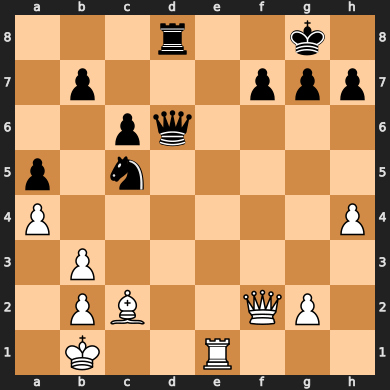

In [15]:
board,y = chess.Board.from_epd("3r2k1/1p3ppp/2pq4/p1n5/P6P/1P6/1PB2QP1/1K2R3 w - - am Rd1")
bm=list(y.values())[0][0]
moves,values=deepbot.get_move_values(board)
sort=join_and_sort(moves,values)
print(bm)
print(sort)
board

f5d4
[[Move.from_uci('f5d4') 1.0]
 [Move.from_uci('h7h5') 0.9145516074450084]
 [Move.from_uci('h7h6') 0.9145516074450084]
 [Move.from_uci('a5d5') 0.9145516074450084]
 [Move.from_uci('f5h4') 0.9043993231810491]
 [Move.from_uci('b6b5') 0.9043993231810491]
 [Move.from_uci('f5e7') 0.9043993231810491]
 [Move.from_uci('d7d5') 0.9027072758037225]
 [Move.from_uci('g8g7') 0.9018612521150592]
 [Move.from_uci('a5a6') 0.9001692047377327]
 [Move.from_uci('a7a6') 0.8934010152284264]
 [Move.from_uci('d7d6') 0.8917089678510999]
 [Move.from_uci('f5d6') 0.8908629441624365]
 [Move.from_uci('d8c8') 0.8849407783417935]
 [Move.from_uci('e6e5') 0.8790186125211505]
 [Move.from_uci('f5g7') 0.8654822335025381]
 [Move.from_uci('g6g5') 0.8604060913705583]
 [Move.from_uci('d8a8') 0.8451776649746193]
 [Move.from_uci('d8f8') 0.8367174280879864]
 [Move.from_uci('d7e7') 0.8291032148900169]
 [Move.from_uci('d7c7') 0.8164128595600677]
 [Move.from_uci('g8f8') 0.8071065989847716]
 [Move.from_uci('f5h6') 0.8062605752961083

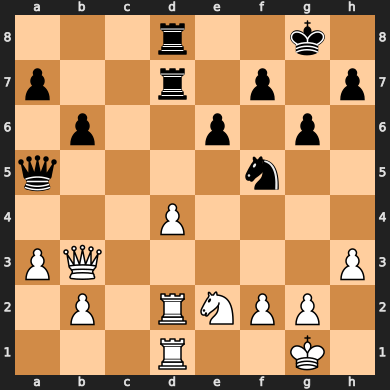

In [16]:
board,y = chess.Board.from_epd("3r2k1/p2r1p1p/1p2p1p1/q4n2/3P4/PQ5P/1P1RNPP1/3R2K1 b - - bm Nxd4")
bm=list(y.values())[0][0]
moves,values=deepbot.get_move_values(board)
sort=join_and_sort(moves,values)
print(bm)
print(sort)
board

In [17]:
engine = chess.engine.SimpleEngine.popen_uci(path)

In [18]:
result = engine.play(board, chess.engine.Limit(depth=20))

In [19]:
result

<PlayResult at 0x257fe004d00 (move=f5d4, ponder=d2d4, info={}, draw_offered=False, resigned=False)>